IPYNB notebook to preprocess data imported from matlab, and convert it into the format accepted by the input

plotting the experimental data

In [1]:
import scipy.io
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import markers

HK plane (dim3)

Text(0.5, 1.0, 'HK plane L=0 ,PBCO experimental fitted peaks')

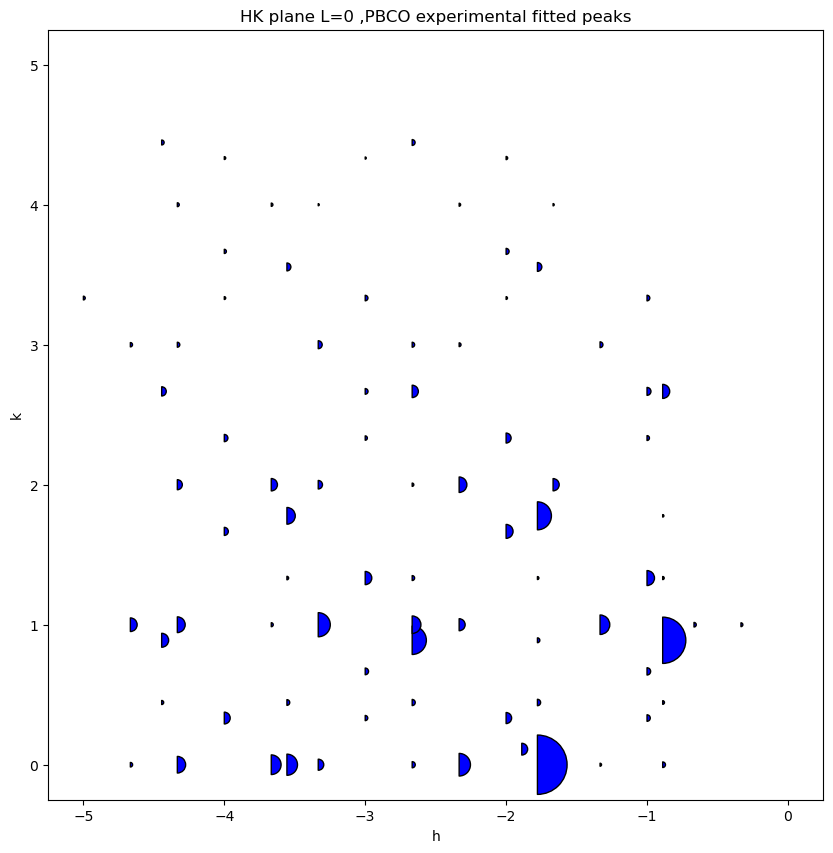

In [24]:
# Load data
h_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim3/h_coords.csv', header=None).values.flatten()
k_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim3/k_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim3/intensity_arr1.csv', header=None).values

h , k = np.meshgrid(h_coords , k_coords)

h_flat = h.flatten()
k_flat = k.flatten()
intensity_flat = intensity_arr.flatten()

# copy_h_flat = h_flat
# h_flat = l_flat
# l_flat = copy_h_flat


pyplot.scatter(h_flat , k_flat , s=intensity_flat *10 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('k')
#add title
pyplot.title('HK plane L=0 ,PBCO experimental fitted peaks')

create a csv file with 4 columns. first column is for h_coords, then for k_coords, and then for l_coords (all equal to 0). then another row for the experimental intensity, with title 'intensity_exp'.

In [25]:
#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': h_flat,
    'k': k_flat,
    'l': np.zeros_like(h_flat),
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(h_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
data = data[~((data['h'] % 1 == 0) & (data['k'] % 1 == 0))]
#remove all rows where either h or k are both less than 1
data = data[~((data['h'] < 1) & (data['k'] < 1))]

#only keep the 1/3 peaks along h
data['h'] = np.round(data['h'] * 9)
data['h'] = data['h'].astype(int)
data = data[data['h'] % (3) == 0]
data['h'] = data['h'].astype(float)
data['h'] = data['h'] / 9


data['k'] = np.round(data['k'] * 9)
data['k'] = data['k'].astype(int)
data = data[data['k'] % (3) == 0]
data['k'] = data['k'].astype(float)
data['k'] = data['k'] / 9


data.to_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim3/100K_dim3_peaks.csv', index=False)
print(data)

             h    k    l  intensity_exp  intensity_exp_err
417  -0.333333  1.0  0.0       0.757543                0.0
420  -0.666667  1.0  0.0       1.077196                0.0
426  -1.333333  1.0  0.0      19.637846                0.0
429  -1.666667  1.0  0.0       0.000000                0.0
435  -2.333333  1.0  0.0       7.496835                0.0
...        ...  ...  ...            ...                ...
2094 -2.666667  5.0  0.0       0.000000                0.0
2100 -3.333333  5.0  0.0       0.000000                0.0
2103 -3.666667  5.0  0.0       0.000000                0.0
2109 -4.333333  5.0  0.0       0.000000                0.0
2112 -4.666667  5.0  0.0       0.000000                0.0

[152 rows x 5 columns]


DIM2

In [26]:
# Load data
h_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim2/h_coords.csv', header=None).values.flatten()
l_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim2/l_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim2/intensity_arr1.csv', header=None).values
extra_intensity = np.zeros([136 , 90])
intensity_arr = np.concatenate((intensity_arr, extra_intensity), axis=1)


In [27]:
h , l = np.meshgrid(h_coords , l_coords)

h_flat = h.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()

#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': h_flat,
    'k': np.zeros_like(h_flat),
    'l': l_flat,
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(h_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
data = data[~((data['h'] % 1 == 0) & (data['l'] % 1 == 0))]
#remove all rows where either h is smaller than -5
data = data[data['h'] >= -5]
data['l'] = np.round(data['l'] * 9)
data['l'] = data['l'].astype(int)
# keep all rows where l is not divisible by 
data = data[data['l'] % (3) == 0]
data['l'] = data['l'].astype(float)
data['l'] = data['l'] / 9

#only keep the 1/3 peaks along h
data['h'] = np.round(data['h'] * 9)
data['h'] = data['h'].astype(int)
data = data[data['h'] % (3) == 0]
data['h'] = data['h'].astype(float)
data['h'] = data['h'] / 9

data.to_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim2/100K_dim2_peaks.csv', index=False)
print(data)

              h    k     l  intensity_exp  intensity_exp_err
3     -0.333333  0.0   0.0       0.000000                0.0
6     -0.666667  0.0   0.0       0.000000                0.0
12    -1.333333  0.0   0.0       0.373767                0.0
15    -1.666667  0.0   0.0      30.354001                0.0
21    -2.333333  0.0   0.0      10.222200                0.0
...         ...  ...   ...            ...                ...
18372 -1.333333  0.0  15.0       0.000000                0.0
18381 -2.333333  0.0  15.0       0.000000                0.0
18384 -2.666667  0.0  15.0       0.000000                0.0
18390 -3.333333  0.0  15.0       0.000000                0.0
18402 -4.666667  0.0  15.0       0.000000                0.0

[576 rows x 5 columns]


Length of h_coords: 136, Length of l_coords: 136


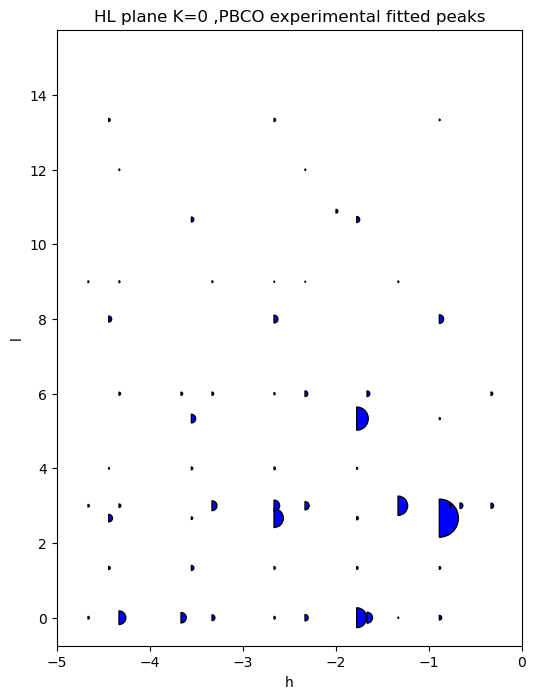

In [28]:


#extend h_coords to match the length of l_coords

print(f"Length of h_coords: {len(h_coords)}, Length of l_coords: {len(l_coords)}")

h , l = np.meshgrid(h_coords , l_coords)

h_flat = h.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()

# copy_h_flat = h_flat
# h_flat = l_flat
# l_flat = copy_h_flat


pyplot.scatter(h_flat , l_flat , s=intensity_flat *2 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
#pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('l')
#add title
pyplot.title('HL plane K=0 ,PBCO experimental fitted peaks')
pyplot.xlim(-5 , 0)
#figure size
pyplot.gcf().set_size_inches(6, 8)

DIM1

In [34]:
# Load data
k_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim1/k_coords.csv', header=None).values.flatten()
l_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim1/l_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/raw_data/dim1/intensity_arr1.csv', header=None).values
print(f"Length of k_coords: {len(k_coords)}, Length of l_coords: {len(l_coords)}")

extra_intensity = np.zeros([136 , 90])
intensity_arr = np.concatenate((intensity_arr, extra_intensity), axis=1)

Length of k_coords: 136, Length of l_coords: 136


In [35]:
k , l = np.meshgrid(k_coords , l_coords)

k_flat = k.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()
print(f"Length of k_flat: {len(k_flat)}, Length of l_flat: {len(l_flat)}, Length of intensity_flat: {len(intensity_flat)}")

#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': np.zeros_like(k_flat),
    'k': k_flat,
    'l': l_flat,
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(k_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
data = data[~((data['l'] % 1 == 0) & (data['k'] % 1 == 0))]
#remove all rows where either h is smaller than -5
data = data[data['k'] >= -5]
data['l'] = np.round(data['l'] * 9)
data['l'] = data['l'].astype(int)
# keep all rows where l is not divisible by 
data = data[data['l'] % (3) == 0]
data['l'] = data['l'].astype(float)
data['l'] = data['l'] / 9
#remove all rows where k is an integer

data['k'] = np.round(data['k'] * 9)
data['k'] = data['k'].astype(int)
data = data[data['k'] % (3) == 0]
data['k'] = data['k'].astype(float)
data['k'] = data['k'] / 9

data.to_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim1/100K_dim1_peaks.csv', index=False)
print(data)

Length of k_flat: 18496, Length of l_flat: 18496, Length of intensity_flat: 18496
         h         k     l  intensity_exp  intensity_exp_err
3      0.0 -0.333333   0.0       0.000000                0.0
6      0.0 -0.666667   0.0       0.000000                0.0
12     0.0 -1.333333   0.0       0.391263                0.0
15     0.0 -1.666667   0.0       0.000000                0.0
21     0.0 -2.333333   0.0      15.871300                0.0
...    ...       ...   ...            ...                ...
18363  0.0 -0.333333  15.0       0.000000                0.0
18366  0.0 -0.666667  15.0       0.000000                0.0
18372  0.0 -1.333333  15.0       0.000000                0.0
18375  0.0 -1.666667  15.0       0.000000                0.0
18381  0.0 -2.333333  15.0       0.000000                0.0

[560 rows x 5 columns]


Length of k_coords: 136, Length of l_coords: 136


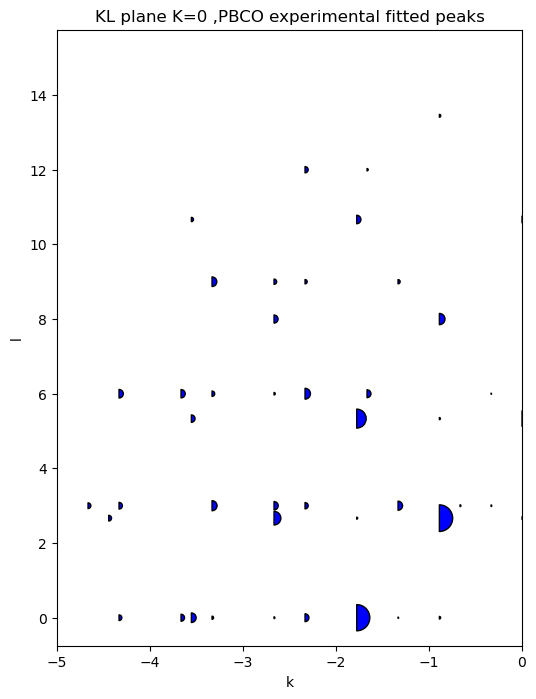

In [32]:
print(f"Length of k_coords: {len(k_coords)}, Length of l_coords: {len(l_coords)}")


pyplot.scatter(k_flat , l_flat , s=intensity_flat *2 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
#pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('k')
pyplot.ylabel('l')
#add title
pyplot.title('KL plane K=0 ,PBCO experimental fitted peaks')
pyplot.xlim(-5 , 0)
#figure size
pyplot.gcf().set_size_inches(6, 8)

# concatinate all the peaks together

In [36]:
dim1 = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim1/100K_dim1_peaks.csv')
dim2 = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim2/100K_dim2_peaks.csv')
dim3 = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/dim3/100K_dim3_peaks.csv')

# concatinate all the peaks together
data = pd.concat([dim1, dim2, dim3], ignore_index=True)
print(data)

print(data.shape)

data.to_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/raw_data/1_3_combined_peaks.csv', index=False)


intensity_exp = data['intensity_exp'].astype(float)
intensity_exp = np.log10(intensity_exp + 1) 
data['intensity_exp'] = intensity_exp

data.to_csv('raw_data/1_3_LOGcombined_peaks.csv', index=False)


             h         k    l  intensity_exp  intensity_exp_err
0     0.000000 -0.333333  0.0       0.000000                0.0
1     0.000000 -0.666667  0.0       0.000000                0.0
2     0.000000 -1.333333  0.0       0.391263                0.0
3     0.000000 -1.666667  0.0       0.000000                0.0
4     0.000000 -2.333333  0.0      15.871300                0.0
...        ...       ...  ...            ...                ...
1283 -2.666667  5.000000  0.0       0.000000                0.0
1284 -3.333333  5.000000  0.0       0.000000                0.0
1285 -3.666667  5.000000  0.0       0.000000                0.0
1286 -4.333333  5.000000  0.0       0.000000                0.0
1287 -4.666667  5.000000  0.0       0.000000                0.0

[1288 rows x 5 columns]
(1288, 5)


Find where to add the shifts in the list of atom coordinates. 

add the atom displacement distortions

1. check the cif file, section `_iso_parent-to-child.transform_Pp_abc` ( very end of the cif file), change the transformation accordingly in `functions`

# Print all the atom coords

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu


crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3.cif')
for a, n, c, d in crystal.lattice.base():
    print([a, [n[0], n[1], n[2]]])

#User: copy the output of the above code into PrNiO3_C4_coords.txt
# using ctrl + f:
# 1. replace (number) with 'number' 
# 2. remove all commas
# 3. replace double spacing with single spacing


[Pr (59), [0.83333, 0.16667, 0.16667]]
[Pr (59), [0.16666999999999998, 0.83333, 0.16667]]
[Pr (59), [0.16666999999999998, 0.16667, 0.83333]]
[Pr (59), [0.83333, 0.83333, 0.83333]]
[Pr (59), [0.16666999999999998, 0.83333, 0.83333]]
[Pr (59), [0.83333, 0.16667, 0.83333]]
[Pr (59), [0.83333, 0.83333, 0.16667]]
[Pr (59), [0.16666999999999998, 0.16667, 0.16667]]
[Pr (59), [0.83333, 0.16667, 0.5]]
[Pr (59), [0.16666999999999998, 0.83333, 0.5]]
[Pr (59), [0.16666999999999998, 0.16667, 0.5]]
[Pr (59), [0.83333, 0.83333, 0.5]]
[Pr (59), [0.83333, 0.5, 0.16667]]
[Pr (59), [0.16666999999999998, 0.5, 0.16667]]
[Pr (59), [0.16666999999999998, 0.5, 0.83333]]
[Pr (59), [0.83333, 0.5, 0.83333]]
[Pr (59), [0.83333, 0.5, 0.5]]
[Pr (59), [0.16666999999999998, 0.5, 0.5]]
[Pr (59), [0.5, 0.16667, 0.16667]]
[Pr (59), [0.5, 0.83333, 0.16667]]
[Pr (59), [0.5, 0.16667, 0.83333]]
[Pr (59), [0.5, 0.83333, 0.83333]]
[Pr (59), [0.5, 0.16667, 0.5]]
[Pr (59), [0.5, 0.83333, 0.5]]
[Pr (59), [0.5, 0.5, 0.16667]]
[Pr (

# The following code adds the atomic displacement variables. 

Things to do beforehand:
1. Go to `PrNiO2_C4_info.cif` , find `_atom_site_fract_symmform`
2. copy the info in `_atom_site_fract_symmform` to a new file called `PrNiO2_C4_atom_site_fract_symmform.txt`
3. In `PrNiO2_C4_atom_site_fract_symmform.txt`:
3.1 replace commas with a single space
3.2 replace double space with single space
4. change the output file name to the corresponding crystal

Output:
`PrNiO2_C4_coords_processed.txt` and `PrNiO2_C4_shift_names.txt`

1. in `PrNiO2_C4_coords_processed.txt` , remove all "
2. remove the comma in the last line
3. copy all into `functions`, and into `atom_position_list`

1. in `PrNiO2_C4_shift_names.txt` , copy to variables list in `atom_position_list`

In [7]:
#load a text file into a dataframe
PBCO_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_coords.txt' , delim_whitespace=True, header=None)
PBCO_distortions = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)

#load PBCO_distortions into a list of lists
PBCO_distortions = PBCO_distortions.values.tolist()
PBCO_coords = PBCO_coords.values.tolist()

#create a new column in PBCO_distortions, which adds the second column up cumulatively
PBCO_distortions = pd.DataFrame(PBCO_distortions)
PBCO_coords = pd.DataFrame(PBCO_coords)

print(PBCO_coords)
print(PBCO_distortions)

PBCO_coords[2] = PBCO_coords[2].astype(str)
PBCO_coords[3] = PBCO_coords[3].astype(str)
PBCO_coords[4] = PBCO_coords[4].astype(str)


PBCO_distortions[11] = PBCO_distortions[2].cumsum()

#create a list to store all the names of shift name variables
shift_names = []

for i in range(len(PBCO_distortions)):
    #take the ith and ith + 1 element in the last column, and load them into a variable called num_atom_start and num_atom_end. if i is 1 , then num_atom_start must equal to 1, and num_atom_end must equal to the first element in the last column
    if i == 0:
        num_atom_start = 0
        num_atom_end = PBCO_distortions.iloc[i, -1]
    else:
        num_atom_start = PBCO_distortions.iloc[i, -1] - PBCO_distortions.iloc[i, 2]
        num_atom_end = PBCO_distortions.iloc[i, -1]
    
    #check if there are Dx , Dy , Dz in the 3rd , 4th and 5th columns of PBCO_distortions
    if 'Dx' in PBCO_distortions.iloc[i, 8]:
        #string the char in the first column ith row to 'Dx'
        dx_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dx_shift_name = 0
    if 'Dy' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dy_shift_name = 0
    if 'Dz' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first coumn ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dz' 
    elif 'Dy' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dz_shift_name = 0



    if dx_shift_name != 0:
        shift_names.append(dx_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 2] = str(PBCO_coords.iloc[j, 2] + ' + ') + dx_shift_name
    if dy_shift_name != 0:
        shift_names.append(dy_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 3] = str(PBCO_coords.iloc[j, 3] + ' + ') + dy_shift_name
    if dz_shift_name != 0:
        shift_names.append(dz_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 4] = str(PBCO_coords.iloc[j, 4] + ' + ') + dz_shift_name


for k in range(len(PBCO_coords)):
    PBCO_coords.iloc[k, 0] = str("['" + PBCO_coords.iloc[k, 0] + "'")
    PBCO_coords.iloc[k, 2] = str('[' + PBCO_coords.iloc[k, 2])
    PBCO_coords.iloc[k, 4] = str(PBCO_coords.iloc[k, 4] + "]],")

print(PBCO_coords)
#save PBCO_coords to a csv file
PBCO_coords.to_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_coords_processed.txt', index=False, header=False)


print(shift_names)
# Convert shift_names to a DataFrame
shift_names = pd.DataFrame(shift_names)
#print all shift_names into a single line
shift_names_txt = shift_names[0].str.cat(sep=', ')
print(shift_names)
# Save shift_names to a text file
with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_shift_names.txt', 'w') as f:
    f.write(shift_names_txt)


C:\Users\User\AppData\Local\Temp\ipykernel_6648\1253961372.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_coords.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_6648\1253961372.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_distortions = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)


      0     1        2        3        4
0    Pr  '59'  0.83333  0.16667  0.16667
1    Pr  '59'  0.16667  0.83333  0.16667
2    Pr  '59'  0.16667  0.16667  0.83333
3    Pr  '59'  0.83333  0.83333  0.83333
4    Pr  '59'  0.16667  0.83333  0.83333
..   ..   ...      ...      ...      ...
346   O   '8'  0.33333  0.28053  0.66667
347   O   '8'  0.66667  0.28053  0.66667
348   O   '8'  0.33333  0.71947  0.66667
349   O   '8'  0.33333  0.28053  0.33333
350   O   '8'  0.66667  0.71947  0.33333

[351 rows x 5 columns]
       0   1   2      3        4        5        6    7   8   9   10
0   Pr1_1  Pr   8  alpha  0.83333  0.16667  0.16667  1.0  Dx  Dy  Dz
1   Pr1_2  Pr   4      z  0.83333  0.16667  0.50000  1.0  Dx  Dy   0
2   Pr1_3  Pr   4      x  0.83333  0.50000  0.16667  1.0  Dx   0  Dz
3   Pr1_4  Pr   2      l  0.83333  0.50000  0.50000  1.0  Dx   0   0
4   Pr1_5  Pr   4      v  0.50000  0.16667  0.16667  1.0   0  Dy  Dz
..    ...  ..  ..    ...      ...      ...      ...  ...  ..  ..  ..
7

# the following code is only applicable if the parameters are the atomic displacements. to fit the modes directly, skip to the next section

Preprocess get mode amplitudes

In [ ]:
mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)

#CONVERT TO A LIST OF LISTS
mode_names = mode_names.values.tolist()

# Convert mode_names to a DataFrame
mode_names = pd.DataFrame(mode_names)

num_modes = len(mode_names) 
print(num_modes)

mode_name1 = []
# rewrite the mode names into a new list with the first column as the mode name 
for i in range(num_modes):
    mode_name1.append(str('"' + str(mode_names.iloc[i, 1]) + '"' + ': '))

print(mode_name1)


445
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '

C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)


In [168]:
#make a zeros array with len(shift_names) rows and columns
mode_np_matrix = np.zeros((num_modes, num_modes))

print(mode_np_matrix.shape)
print(mode_np_matrix)

#load the third column values from mode_matrix into mode_np_matrix.first column of ith row is the row number of the matrix, second column is the column number of the matrix, third column is the value of the matrix
for i in range(len(mode_matrix)):
    row = mode_matrix.iloc[i, 0] - 1
    col = mode_matrix.iloc[i, 1] - 1
    value = mode_matrix.iloc[i, 2]
    mode_np_matrix[row, col] = value

print(mode_np_matrix)


print(mode_name1)


for row in range(num_modes):
    for col in range(num_modes):
        if mode_np_matrix[row, col] != 0:
            shift_name = shift_names.iloc[col,0]
            
            if mode_np_matrix[row, col] < 0:
                matrix_element = mode_np_matrix[row, col] * -1
                string_mode_np_matrix = str(matrix_element)
                dependent = ' - ' + string_mode_np_matrix + ' * ' + shift_name
            else:
                string_mode_np_matrix = str(mode_np_matrix[row, col])
                dependent = ' + ' + string_mode_np_matrix + ' * ' + shift_name
            
            mode_name1[row] = str(mode_name1[row]) + dependent
        else:
            mode_name1[row] = str(mode_name1[row])



# Save mode_names to a text file without using pandas
with open('raw_data/mode_names_processed.txt', 'w') as f:
    for name in mode_name1:
        f.write(name + ',' + '\n')


'''mode_names_txt = pd.DataFrame(mode_name1)
mode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)

'''


(445, 445)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.32635  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.32635  0.3473  ...  0.       0.       0.     ]
 [-0.17365  0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.      -0.17365]
 [ 0.       0.       0.      ...  0.03015  0.       0.     ]
 [ 0.       0.       0.      ...  0.      -0.17365  0.     ]]
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h

"mode_names_txt = pd.DataFrame(mode_name1)\nmode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)\n\n"

# This is the next section. fit the mode amplitudes directly
Things to do beforehand:
1. create txt file `PrNiO2_C4_mode_amp_bounds.txt`
2. from `PrNiO2_C4.str` file, at mode definitions, copy all mode names and their info
3. run the file

the code should generate 2 files: `PrNiO2_C4_mode_names_variable` , `PrNiO2_C4_max_bound_vectors`

`PrNiO2_C4_mode_names_variable.txt`: copy this into `functions`, into `shift_atoms`.

`PrNiO2_C4_max_bound_vectors.txt`: copy this into `gradientdescent.ipynb` to `max_mode_amps`




In [8]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_mode_amp_bounds.txt' , delim_whitespace=True, header=None)
print(mode_amp_bounds)
max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()

indices_to_zero = [118,54,90,114,138]
# Set the specified indices to zero
for index in indices_to_zero:
    max_bound_vectors[index] = 0.0

mode_names_variable = mode_amp_bounds.iloc[:, 1].values.tolist()

#remove '!' from all elements in mode_names
mode_names_variable = [name.replace('!', '') for name in mode_names_variable]

with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_mode_names_variable.txt', 'w') as f:
    for name in mode_names_variable:
        f.write(name + ',')

with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_max_bound_vectors.txt', 'w') as f:
    for vector in max_bound_vectors:
        f.write(str(vector) + ',')


       0      1    2    3     4    5     6  \
0    prm    !a1  0.0  min -2.12  max  2.12   
1    prm    !a2  0.0  min -2.12  max  2.12   
2    prm    !a3  0.0  min -2.12  max  2.12   
3    prm    !a4  0.0  min -4.24  max  4.24   
4    prm    !a5  0.0  min -4.24  max  4.24   
..   ...    ...  ...  ...   ...  ...   ...   
151  prm  !a152  0.0  min -4.90  max  4.90   
152  prm  !a153  0.0  min -4.24  max  4.24   
153  prm  !a154  0.0  min -3.67  max  3.67   
154  prm  !a155  0.0  min -4.24  max  4.24   
155  prm  !a156  0.0  min -4.24  max  4.24   

                                                     7        8  
0    'Pmmm[1/3,1/3,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B3u(a)  
1    'Pmmm[1/3,1/3,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B1u(a)  
2    'Pmmm[1/3,1/3,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B2u(a)  
3                    'Pmmm[0,1/3,0]DT1(a,0)[Pr1:h:dsp]   B2u(a)  
4                    'Pmmm[0,0,1/3]LD1(a,0)[Pr1:h:dsp]   B1u(a)  
..                                                 

C:\Users\User\AppData\Local\Temp\ipykernel_6648\442819517.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_mode_amp_bounds.txt' , delim_whitespace=True, header=None)


1. go to `PrNiO2_C4_info.str`
2. find `mode-amplitude to delta transformation`
3. remove `;:  0.00000` 
4. remove everything in front and including the = sign in each line
5. run code
6. remove all `'` from the file.
7. remove last comma
8. copy to `shift_atoms_copy` below
9. print matrix

In [ ]:
delta_transform = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_delta_transformation.txt' ,header=None)
delta_transform = pd.DataFrame(delta_transform)

wanted_modes = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/PBCO_1_3_mode_names_variable.txt', header=None)
wanted_modes = wanted_modes.values.flatten().tolist()
for i in range(len(wanted_modes)):
    wanted_modes[i] = str(wanted_modes[i])

# Convert delta_transform to a list of lists
delta_transform = delta_transform.values.tolist()
#string each row

with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/PBCO_1_3/delta_transformation_processed.txt', 'w') as f:
    for row in delta_transform:
        f.write( str(row)  + ',\n')
#split each row into columns


In [12]:
def shift_atoms_copy(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71,a72,a73,a74,a75,a76,a77,a78,a79,a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90,a91,a92,a93,a94,a95,a96,a97,a98,a99,a100,a101,a102,a103,a104,a105,a106,a107,a108,a109,a110,a111,a112,a113,a114,a115,a116,a117,a118,a119,a120,a121,a122,a123,a124,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a147,a148,a149,a150,a151,a152,a153,a154,a155,a156):

    res = [
        [+  0.01028*a1 -  0.02057*a6 -  0.01454*a9 -  0.01454*a11],
        [-  0.00336*a2 +  0.00672*a5 +  0.00476*a7 +  0.00476*a10],
        [-  0.01011*a3 +  0.02022*a4 +  0.01430*a8 +  0.01430*a12],
        [-  0.02057*a1 -  0.02057*a6 -  0.01454*a9 +  0.02908*a11],
        [+  0.00672*a2 +  0.00672*a5 -  0.00951*a7 +  0.00476*a10],
        [-  0.02057*a1 -  0.02057*a6 +  0.02908*a9 -  0.01454*a11],
        [+  0.02022*a3 +  0.02022*a4 -  0.02860*a8 +  0.01430*a12],
        [+  0.04113*a1 -  0.02057*a6 +  0.02908*a9 +  0.02908*a11],
        [+  0.00672*a2 +  0.00672*a5 +  0.00476*a7 -  0.00951*a10],
        [+  0.02022*a3 +  0.02022*a4 +  0.01430*a8 -  0.02860*a12],
        [-  0.01345*a2 +  0.00672*a5 -  0.00951*a7 -  0.00951*a10],
        [-  0.04044*a3 +  0.02022*a4 -  0.02860*a8 -  0.02860*a12],
        [-  0.01259*a17 +  0.00727*a18 -  0.01454*a25 -  0.01781*a32 -  0.01028*a33 -  0.01028*a36],
        [-  0.00137*a13 -  0.00238*a14 +  0.00388*a19 +  0.00275*a20 +  0.00549*a22 +  0.00275*a24 +  0.00194*a26 -  0.00336*a27 +  0.00194*a30 -  0.00336*a31 -  0.00194*a34],
        [+  0.01238*a15 -  0.00715*a16 +  0.01430*a21 +  0.01751*a28 +  0.01011*a29 +  0.01011*a35],
        [+  0.02519*a17 -  0.01454*a18 -  0.01454*a25 -  0.01781*a32 -  0.01028*a33 +  0.02057*a36],
        [+  0.00275*a13 +  0.00476*a14 +  0.00388*a19 -  0.00549*a20 +  0.00549*a22 +  0.00275*a24 -  0.00388*a26 +  0.00672*a27 +  0.00194*a30 -  0.00336*a31 +  0.00388*a34],
        [-  0.01454*a18 -  0.01454*a25 +  0.01781*a32 -  0.01028*a33 -  0.01028*a36],
        [+  0.00275*a13 +  0.00388*a19 +  0.00275*a20 -  0.00275*a22 +  0.00476*a23 +  0.00275*a24 +  0.00194*a26 +  0.00336*a27 +  0.00194*a30 +  0.00336*a31 -  0.00194*a34],
        [+  0.01430*a16 +  0.01430*a21 -  0.01751*a28 +  0.01011*a29 +  0.01011*a35],
        [+  0.02908*a18 -  0.01454*a25 +  0.01781*a32 -  0.01028*a33 +  0.02057*a36],
        [-  0.00549*a13 +  0.00388*a19 -  0.00549*a20 -  0.00275*a22 +  0.00476*a23 +  0.00275*a24 -  0.00388*a26 -  0.00672*a27 +  0.00194*a30 +  0.00336*a31 +  0.00388*a34],
        [+  0.01259*a17 +  0.00727*a18 -  0.01454*a25 +  0.02057*a33 -  0.01028*a36],
        [-  0.00137*a13 +  0.00238*a14 +  0.00388*a19 +  0.00275*a20 -  0.00275*a22 -  0.00476*a23 +  0.00275*a24 -  0.00388*a26 -  0.00388*a30 -  0.00194*a34],
        [-  0.01238*a15 -  0.00715*a16 +  0.01430*a21 -  0.02022*a29 +  0.01011*a35],
        [-  0.02519*a17 -  0.01454*a18 -  0.01454*a25 +  0.02057*a33 +  0.02057*a36],
        [+  0.00275*a13 -  0.00476*a14 +  0.00388*a19 -  0.00549*a20 -  0.00275*a22 -  0.00476*a23 +  0.00275*a24 +  0.00776*a26 -  0.00388*a30 +  0.00388*a34],
        [+  0.00275*a13 +  0.00476*a14 +  0.00388*a19 +  0.00275*a20 +  0.00549*a22 -  0.00549*a24 +  0.00194*a26 -  0.00336*a27 -  0.00388*a30 +  0.00672*a31 +  0.00388*a34],
        [-  0.02477*a15 +  0.01430*a16 +  0.01430*a21 +  0.01751*a28 +  0.01011*a29 -  0.02022*a35],
        [-  0.00549*a13 -  0.00951*a14 +  0.00388*a19 -  0.00549*a20 +  0.00549*a22 -  0.00549*a24 -  0.00388*a26 +  0.00672*a27 -  0.00388*a30 +  0.00672*a31 -  0.00776*a34],
        [-  0.00549*a13 +  0.00388*a19 +  0.00275*a20 -  0.00275*a22 +  0.00476*a23 -  0.00549*a24 +  0.00194*a26 +  0.00336*a27 -  0.00388*a30 -  0.00672*a31 +  0.00388*a34],
        [-  0.02860*a16 +  0.01430*a21 -  0.01751*a28 +  0.01011*a29 -  0.02022*a35],
        [+  0.01098*a13 +  0.00388*a19 -  0.00549*a20 -  0.00275*a22 +  0.00476*a23 -  0.00549*a24 -  0.00388*a26 -  0.00672*a27 -  0.00388*a30 -  0.00672*a31 -  0.00776*a34],
        [+  0.00275*a13 -  0.00476*a14 +  0.00388*a19 +  0.00275*a20 -  0.00275*a22 -  0.00476*a23 -  0.00549*a24 -  0.00388*a26 +  0.00776*a30 +  0.00388*a34],
        [+  0.02477*a15 +  0.01430*a16 +  0.01430*a21 -  0.02022*a29 -  0.02022*a35],
        [-  0.00549*a13 +  0.00951*a14 +  0.00388*a19 -  0.00549*a20 -  0.00275*a22 -  0.00476*a23 -  0.00549*a24 +  0.00776*a26 +  0.00776*a30 -  0.00776*a34],
        [+  0.04044*a39 +  0.02022*a40 +  0.02860*a44 +  0.02860*a48],
        [+  0.01345*a38 +  0.00672*a41 +  0.00951*a43 +  0.00951*a46],
        [-  0.00672*a38 +  0.00672*a41 -  0.00476*a43 +  0.00951*a46],
        [-  0.02022*a39 +  0.02022*a40 -  0.01430*a44 +  0.02860*a48],
        [+  0.04113*a37 +  0.02057*a42 +  0.02908*a45 +  0.02908*a47],
        [-  0.02057*a37 +  0.02057*a42 +  0.02908*a45 -  0.01454*a47],
        [-  0.02022*a39 +  0.02022*a40 +  0.02860*a44 -  0.01430*a48],
        [-  0.02057*a37 +  0.02057*a42 -  0.01454*a45 +  0.02908*a47],
        [-  0.00672*a38 +  0.00672*a41 +  0.00951*a43 -  0.00476*a46],
        [+  0.01028*a37 +  0.02057*a42 -  0.01454*a45 -  0.01454*a47],
        [+  0.00336*a38 +  0.00672*a41 -  0.00476*a43 -  0.00476*a46],
        [+  0.01011*a39 +  0.02022*a40 -  0.01430*a44 -  0.01430*a48],
        [+  0.01098*a49 +  0.00388*a55 +  0.00549*a56 +  0.00549*a58 +  0.00549*a60 +  0.00776*a62 +  0.00776*a66 +  0.00776*a70],
        [-  0.00549*a49 +  0.00388*a55 -  0.00275*a56 +  0.00549*a58 +  0.00549*a60 -  0.00388*a62 +  0.00776*a66 -  0.00388*a70],
        [+  0.02860*a52 +  0.01430*a57 +  0.02022*a65 +  0.02022*a71],
        [-  0.00549*a49 +  0.00951*a50 +  0.00388*a55 +  0.00549*a56 -  0.00275*a58 +  0.00476*a59 +  0.00549*a60 -  0.00388*a62 +  0.00672*a63 -  0.00388*a66 +  0.00672*a67 +  0.00776*a70],
        [+  0.00275*a49 -  0.00476*a50 +  0.00388*a55 -  0.00275*a56 -  0.00275*a58 +  0.00476*a59 +  0.00549*a60 +  0.00194*a62 -  0.00336*a63 -  0.00388*a66 +  0.00672*a67 -  0.00388*a70],
        [-  0.02477*a51 -  0.01430*a52 +  0.01430*a57 -  0.01751*a64 -  0.01011*a65 +  0.02022*a71],
        [-  0.00549*a49 -  0.00951*a50 +  0.00388*a55 +  0.00549*a56 -  0.00275*a58 -  0.00476*a59 +  0.00549*a60 -  0.00388*a62 -  0.00672*a63 -  0.00388*a66 -  0.00672*a67 +  0.00776*a70],
        [+  0.00275*a49 +  0.00476*a50 +  0.00388*a55 -  0.00275*a56 -  0.00275*a58 -  0.00476*a59 +  0.00549*a60 +  0.00194*a62 +  0.00336*a63 -  0.00388*a66 -  0.00672*a67 -  0.00388*a70],
        [+  0.02477*a51 -  0.01430*a52 +  0.01430*a57 +  0.01751*a64 -  0.01011*a65 +  0.02022*a71],
        [+  0.02908*a54 +  0.01454*a61 +  0.02057*a69 +  0.02057*a72],
        [-  0.00549*a49 +  0.00388*a55 +  0.00549*a56 +  0.00549*a58 -  0.00275*a60 +  0.00776*a62 -  0.00388*a66 -  0.00388*a70],
        [-  0.01454*a54 +  0.01454*a61 +  0.02057*a69 -  0.01028*a72],
        [+  0.00275*a49 +  0.00388*a55 -  0.00275*a56 +  0.00549*a58 -  0.00275*a60 -  0.00388*a62 -  0.00388*a66 +  0.00194*a70],
        [-  0.01430*a52 +  0.01430*a57 +  0.02022*a65 -  0.01011*a71],
        [-  0.02519*a53 -  0.01454*a54 +  0.01454*a61 -  0.01781*a68 -  0.01028*a69 +  0.02057*a72],
        [+  0.00275*a49 -  0.00476*a50 +  0.00388*a55 +  0.00549*a56 -  0.00275*a58 +  0.00476*a59 -  0.00275*a60 -  0.00388*a62 +  0.00672*a63 +  0.00194*a66 -  0.00336*a67 -  0.00388*a70],
        [+  0.01259*a53 +  0.00727*a54 +  0.01454*a61 -  0.01781*a68 -  0.01028*a69 -  0.01028*a72],
        [-  0.00137*a49 +  0.00238*a50 +  0.00388*a55 -  0.00275*a56 -  0.00275*a58 +  0.00476*a59 -  0.00275*a60 +  0.00194*a62 -  0.00336*a63 +  0.00194*a66 -  0.00336*a67 +  0.00194*a70],
        [+  0.01238*a51 +  0.00715*a52 +  0.01430*a57 -  0.01751*a64 -  0.01011*a65 -  0.01011*a71],
        [+  0.02519*a53 -  0.01454*a54 +  0.01454*a61 +  0.01781*a68 -  0.01028*a69 +  0.02057*a72],
        [+  0.00275*a49 +  0.00476*a50 +  0.00388*a55 +  0.00549*a56 -  0.00275*a58 -  0.00476*a59 -  0.00275*a60 -  0.00388*a62 -  0.00672*a63 +  0.00194*a66 +  0.00336*a67 -  0.00388*a70],
        [-  0.01259*a53 +  0.00727*a54 +  0.01454*a61 +  0.01781*a68 -  0.01028*a69 -  0.01028*a72],
        [-  0.00137*a49 -  0.00238*a50 +  0.00388*a55 -  0.00275*a56 -  0.00275*a58 -  0.00476*a59 -  0.00275*a60 +  0.00194*a62 +  0.00336*a63 +  0.00194*a66 +  0.00336*a67 +  0.00194*a70],
        [-  0.01238*a51 +  0.00715*a52 +  0.01430*a57 +  0.01751*a64 -  0.01011*a65 -  0.01011*a71],
        [+  0.04044*a75 +  0.02022*a76 +  0.02860*a80 +  0.02860*a84],
        [+  0.00672*a74 +  0.00672*a77 +  0.00476*a79 +  0.00951*a82],
        [-  0.02022*a75 +  0.02022*a76 -  0.01430*a80 +  0.02860*a84],
        [-  0.01345*a74 +  0.00672*a77 -  0.00951*a79 +  0.00951*a82],
        [+  0.02057*a73 +  0.02057*a78 +  0.02908*a81 +  0.01454*a83],
        [-  0.02022*a75 +  0.02022*a76 +  0.02860*a80 -  0.01430*a84],
        [-  0.04113*a73 +  0.02057*a78 +  0.02908*a81 -  0.02908*a83],
        [-  0.01028*a73 +  0.02057*a78 -  0.01454*a81 +  0.01454*a83],
        [-  0.00336*a74 +  0.00672*a77 +  0.00476*a79 -  0.00476*a82],
        [+  0.01011*a75 +  0.02022*a76 -  0.01430*a80 -  0.01430*a84],
        [+  0.02057*a73 +  0.02057*a78 -  0.01454*a81 -  0.02908*a83],
        [+  0.00672*a74 +  0.00672*a77 -  0.00951*a79 -  0.00476*a82],
        [-  0.02519*a89 -  0.01454*a90 -  0.01454*a97 -  0.01781*a104 -  0.01028*a105 -  0.02057*a108],
        [+  0.00275*a85 -  0.00476*a86 +  0.00388*a91 +  0.00549*a92 +  0.00549*a94 +  0.00275*a96 +  0.00776*a98 +  0.00194*a102 -  0.00336*a103 +  0.00388*a106],
        [+  0.01259*a89 +  0.00727*a90 -  0.01454*a97 -  0.01781*a104 -  0.01028*a105 +  0.01028*a108],
        [-  0.00137*a85 +  0.00238*a86 +  0.00388*a91 -  0.00275*a92 +  0.00549*a94 +  0.00275*a96 -  0.00388*a98 +  0.00194*a102 -  0.00336*a103 -  0.00194*a106],
        [+  0.01238*a87 +  0.00715*a88 +  0.01430*a93 +  0.02022*a101 +  0.01011*a107],
        [+  0.02519*a89 -  0.01454*a90 -  0.01454*a97 +  0.01781*a104 -  0.01028*a105 -  0.02057*a108],
        [+  0.00275*a85 +  0.00476*a86 +  0.00388*a91 +  0.00549*a92 -  0.00275*a94 +  0.00476*a95 +  0.00275*a96 -  0.00388*a98 +  0.00672*a99 +  0.00194*a102 +  0.00336*a103 +  0.00388*a106],
        [-  0.01259*a89 +  0.00727*a90 -  0.01454*a97 +  0.01781*a104 -  0.01028*a105 +  0.01028*a108],
        [-  0.00137*a85 -  0.00238*a86 +  0.00388*a91 -  0.00275*a92 -  0.00275*a94 +  0.00476*a95 +  0.00275*a96 +  0.00194*a98 -  0.00336*a99 +  0.00194*a102 +  0.00336*a103 -  0.00194*a106],
        [-  0.01238*a87 +  0.00715*a88 +  0.01430*a93 -  0.01751*a100 -  0.01011*a101 +  0.01011*a107],
        [+  0.02908*a90 -  0.01454*a97 +  0.02057*a105 -  0.02057*a108],
        [-  0.00549*a85 +  0.00388*a91 +  0.00549*a92 -  0.00275*a94 -  0.00476*a95 +  0.00275*a96 -  0.00388*a98 -  0.00672*a99 -  0.00388*a102 +  0.00388*a106],
        [-  0.01454*a90 -  0.01454*a97 +  0.02057*a105 +  0.01028*a108],
        [+  0.00275*a85 +  0.00388*a91 -  0.00275*a92 -  0.00275*a94 -  0.00476*a95 +  0.00275*a96 +  0.00194*a98 +  0.00336*a99 -  0.00388*a102 -  0.00194*a106],
        [-  0.01430*a88 +  0.01430*a93 +  0.01751*a100 -  0.01011*a101 +  0.01011*a107],
        [-  0.00549*a85 +  0.00951*a86 +  0.00388*a91 +  0.00549*a92 +  0.00549*a94 -  0.00549*a96 +  0.00776*a98 -  0.00388*a102 +  0.00672*a103 -  0.00776*a106],
        [+  0.00275*a85 -  0.00476*a86 +  0.00388*a91 -  0.00275*a92 +  0.00549*a94 -  0.00549*a96 -  0.00388*a98 -  0.00388*a102 +  0.00672*a103 +  0.00388*a106],
        [-  0.02477*a87 -  0.01430*a88 +  0.01430*a93 +  0.02022*a101 -  0.02022*a107],
        [-  0.00549*a85 -  0.00951*a86 +  0.00388*a91 +  0.00549*a92 -  0.00275*a94 +  0.00476*a95 -  0.00549*a96 -  0.00388*a98 +  0.00672*a99 -  0.00388*a102 -  0.00672*a103 -  0.00776*a106],
        [+  0.00275*a85 +  0.00476*a86 +  0.00388*a91 -  0.00275*a92 -  0.00275*a94 +  0.00476*a95 -  0.00549*a96 +  0.00194*a98 -  0.00336*a99 -  0.00388*a102 -  0.00672*a103 +  0.00388*a106],
        [+  0.02477*a87 -  0.01430*a88 +  0.01430*a93 -  0.01751*a100 -  0.01011*a101 -  0.02022*a107],
        [+  0.01098*a85 +  0.00388*a91 +  0.00549*a92 -  0.00275*a94 -  0.00476*a95 -  0.00549*a96 -  0.00388*a98 -  0.00672*a99 +  0.00776*a102 -  0.00776*a106],
        [-  0.00549*a85 +  0.00388*a91 -  0.00275*a92 -  0.00275*a94 -  0.00476*a95 -  0.00549*a96 +  0.00194*a98 +  0.00336*a99 +  0.00776*a102 +  0.00388*a106],
        [+  0.02860*a88 +  0.01430*a93 +  0.01751*a100 -  0.01011*a101 -  0.02022*a107],
        [+  0.00275*a109 -  0.00476*a110 +  0.00388*a115 +  0.00275*a116 +  0.00549*a118 +  0.00549*a120 +  0.00194*a122 -  0.00336*a123 +  0.00776*a126 +  0.00388*a130],
        [+  0.02477*a111 +  0.01430*a112 +  0.01430*a117 +  0.01751*a124 +  0.01011*a125 +  0.02022*a131],
        [-  0.00549*a109 +  0.00951*a110 +  0.00388*a115 -  0.00549*a116 +  0.00549*a118 +  0.00549*a120 -  0.00388*a122 +  0.00672*a123 +  0.00776*a126 -  0.00776*a130],
        [+  0.00275*a109 +  0.00476*a110 +  0.00388*a115 +  0.00275*a116 -  0.00275*a118 +  0.00476*a119 +  0.00549*a120 +  0.00194*a122 +  0.00336*a123 -  0.00388*a126 +  0.00672*a127 +  0.00388*a130],
        [-  0.02477*a111 +  0.01430*a112 +  0.01430*a117 -  0.01751*a124 +  0.01011*a125 +  0.02022*a131],
        [-  0.00549*a109 -  0.00951*a110 +  0.00388*a115 -  0.00549*a116 -  0.00275*a118 +  0.00476*a119 +  0.00549*a120 -  0.00388*a122 -  0.00672*a123 -  0.00388*a126 +  0.00672*a127 -  0.00776*a130],
        [-  0.00549*a109 +  0.00388*a115 +  0.00275*a116 -  0.00275*a118 -  0.00476*a119 +  0.00549*a120 -  0.00388*a122 -  0.00388*a126 -  0.00672*a127 +  0.00388*a130],
        [-  0.02860*a112 +  0.01430*a117 -  0.02022*a125 +  0.02022*a131],
        [+  0.01098*a109 +  0.00388*a115 -  0.00549*a116 -  0.00275*a118 -  0.00476*a119 +  0.00549*a120 +  0.00776*a122 -  0.00388*a126 -  0.00672*a127 -  0.00776*a130],
        [+  0.01259*a113 +  0.00727*a114 +  0.01454*a121 +  0.02057*a129 +  0.01028*a132],
        [-  0.00137*a109 +  0.00238*a110 +  0.00388*a115 +  0.00275*a116 +  0.00549*a118 -  0.00275*a120 +  0.00194*a122 -  0.00336*a123 -  0.00388*a126 -  0.00194*a130],
        [-  0.01238*a111 -  0.00715*a112 +  0.01430*a117 +  0.01751*a124 +  0.01011*a125 -  0.01011*a131],
        [-  0.02519*a113 -  0.01454*a114 +  0.01454*a121 +  0.02057*a129 -  0.02057*a132],
        [+  0.00275*a109 -  0.00476*a110 +  0.00388*a115 -  0.00549*a116 +  0.00549*a118 -  0.00275*a120 -  0.00388*a122 +  0.00672*a123 -  0.00388*a126 +  0.00388*a130],
        [-  0.01259*a113 +  0.00727*a114 +  0.01454*a121 -  0.01781*a128 -  0.01028*a129 +  0.01028*a132],
        [-  0.00137*a109 -  0.00238*a110 +  0.00388*a115 +  0.00275*a116 -  0.00275*a118 +  0.00476*a119 -  0.00275*a120 +  0.00194*a122 +  0.00336*a123 +  0.00194*a126 -  0.00336*a127 -  0.00194*a130],
        [+  0.01238*a111 -  0.00715*a112 +  0.01430*a117 -  0.01751*a124 +  0.01011*a125 -  0.01011*a131],
        [+  0.02519*a113 -  0.01454*a114 +  0.01454*a121 -  0.01781*a128 -  0.01028*a129 -  0.02057*a132],
        [+  0.00275*a109 +  0.00476*a110 +  0.00388*a115 -  0.00549*a116 -  0.00275*a118 +  0.00476*a119 -  0.00275*a120 -  0.00388*a122 -  0.00672*a123 +  0.00194*a126 -  0.00336*a127 +  0.00388*a130],
        [-  0.01454*a114 +  0.01454*a121 +  0.01781*a128 -  0.01028*a129 +  0.01028*a132],
        [+  0.00275*a109 +  0.00388*a115 +  0.00275*a116 -  0.00275*a118 -  0.00476*a119 -  0.00275*a120 -  0.00388*a122 +  0.00194*a126 +  0.00336*a127 -  0.00194*a130],
        [+  0.01430*a112 +  0.01430*a117 -  0.02022*a125 -  0.01011*a131],
        [+  0.02908*a114 +  0.01454*a121 +  0.01781*a128 -  0.01028*a129 -  0.02057*a132],
        [-  0.00549*a109 +  0.00388*a115 -  0.00549*a116 -  0.00275*a118 -  0.00476*a119 -  0.00275*a120 +  0.00776*a122 +  0.00194*a126 +  0.00336*a127 +  0.00388*a130],
        [+  0.01098*a133 +  0.00388*a139 +  0.00549*a140 +  0.00549*a142 +  0.00549*a144 +  0.00776*a146 +  0.00776*a150 +  0.00776*a154],
        [-  0.00549*a133 +  0.00388*a139 -  0.00275*a140 +  0.00549*a142 +  0.00549*a144 -  0.00388*a146 +  0.00776*a150 -  0.00388*a154],
        [+  0.02860*a136 +  0.01430*a141 +  0.02022*a149 +  0.02022*a155],
        [-  0.00549*a133 +  0.00951*a134 +  0.00388*a139 +  0.00549*a140 -  0.00275*a142 +  0.00476*a143 +  0.00549*a144 -  0.00388*a146 +  0.00672*a147 -  0.00388*a150 +  0.00672*a151 +  0.00776*a154],
        [+  0.00275*a133 -  0.00476*a134 +  0.00388*a139 -  0.00275*a140 -  0.00275*a142 +  0.00476*a143 +  0.00549*a144 +  0.00194*a146 -  0.00336*a147 -  0.00388*a150 +  0.00672*a151 -  0.00388*a154],
        [-  0.02477*a135 -  0.01430*a136 +  0.01430*a141 -  0.01751*a148 -  0.01011*a149 +  0.02022*a155],
        [-  0.00549*a133 -  0.00951*a134 +  0.00388*a139 +  0.00549*a140 -  0.00275*a142 -  0.00476*a143 +  0.00549*a144 -  0.00388*a146 -  0.00672*a147 -  0.00388*a150 -  0.00672*a151 +  0.00776*a154],
        [+  0.00275*a133 +  0.00476*a134 +  0.00388*a139 -  0.00275*a140 -  0.00275*a142 -  0.00476*a143 +  0.00549*a144 +  0.00194*a146 +  0.00336*a147 -  0.00388*a150 -  0.00672*a151 -  0.00388*a154],
        [+  0.02477*a135 -  0.01430*a136 +  0.01430*a141 +  0.01751*a148 -  0.01011*a149 +  0.02022*a155],
        [+  0.02908*a138 +  0.01454*a145 +  0.02057*a153 +  0.02057*a156],
        [-  0.00549*a133 +  0.00388*a139 +  0.00549*a140 +  0.00549*a142 -  0.00275*a144 +  0.00776*a146 -  0.00388*a150 -  0.00388*a154],
        [-  0.01454*a138 +  0.01454*a145 +  0.02057*a153 -  0.01028*a156],
        [+  0.00275*a133 +  0.00388*a139 -  0.00275*a140 +  0.00549*a142 -  0.00275*a144 -  0.00388*a146 -  0.00388*a150 +  0.00194*a154],
        [-  0.01430*a136 +  0.01430*a141 +  0.02022*a149 -  0.01011*a155],
        [-  0.02519*a137 -  0.01454*a138 +  0.01454*a145 -  0.01781*a152 -  0.01028*a153 +  0.02057*a156],
        [+  0.00275*a133 -  0.00476*a134 +  0.00388*a139 +  0.00549*a140 -  0.00275*a142 +  0.00476*a143 -  0.00275*a144 -  0.00388*a146 +  0.00672*a147 +  0.00194*a150 -  0.00336*a151 -  0.00388*a154],
        [+  0.01259*a137 +  0.00727*a138 +  0.01454*a145 -  0.01781*a152 -  0.01028*a153 -  0.01028*a156],
        [-  0.00137*a133 +  0.00238*a134 +  0.00388*a139 -  0.00275*a140 -  0.00275*a142 +  0.00476*a143 -  0.00275*a144 +  0.00194*a146 -  0.00336*a147 +  0.00194*a150 -  0.00336*a151 +  0.00194*a154],
        [+  0.01238*a135 +  0.00715*a136 +  0.01430*a141 -  0.01751*a148 -  0.01011*a149 -  0.01011*a155],
        [+  0.02519*a137 -  0.01454*a138 +  0.01454*a145 +  0.01781*a152 -  0.01028*a153 +  0.02057*a156],
        [+  0.00275*a133 +  0.00476*a134 +  0.00388*a139 +  0.00549*a140 -  0.00275*a142 -  0.00476*a143 -  0.00275*a144 -  0.00388*a146 -  0.00672*a147 +  0.00194*a150 +  0.00336*a151 -  0.00388*a154],
        [-  0.01259*a137 +  0.00727*a138 +  0.01454*a145 +  0.01781*a152 -  0.01028*a153 -  0.01028*a156],
        [-  0.00137*a133 -  0.00238*a134 +  0.00388*a139 -  0.00275*a140 -  0.00275*a142 -  0.00476*a143 -  0.00275*a144 +  0.00194*a146 +  0.00336*a147 +  0.00194*a150 +  0.00336*a151 +  0.00194*a154],
        [-  0.01238*a135 +  0.00715*a136 +  0.01430*a141 +  0.01751*a148 -  0.01011*a149 -  0.01011*a155]


    ]

    return res

In [16]:
matrix  = np.zeros([156 , 156])
print(np.shape(matrix))
for i in range (156):
    a = np.zeros(156)
    a[i] = 1
    res = np.array(shift_atoms_copy(*a))
    matrix[:,i] = res[:,0]
    #matrix[:,i] = shift_atoms(*a)

#save as txt using pandas
save_path = '1_3_matrix.txt'
pd.DataFrame(matrix).to_csv(save_path, header=None, index=None, sep=' ')

(156, 156)


In [38]:
random_seed = 42
np.random.seed(random_seed)
a = np.random.uniform(low=-4.0, high=4.0, size=1290  ).astype(np.float32)  # Initialize with random values
print(np.shape(a))
result = matrix @ a 
expected = shift_atoms(*a)
expected = np.array(expected)
print(np.shape(expected))
expected = expected[:,0]
print(np.shape(result))
print(np.shape(expected))

error = np.abs(result - expected)
print('Error:', np.max(error))

print(matrix)
#convert matr
#save as txt file
np.savetxt('matrix.txt', matrix, fmt='%.6f')

print('expected:', expected)
print('result:', result)

(1290,)
(1290, 1)
(1290,)
(1290,)
Error: 4.163336342344337e-17
[[-0.00085  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.00396  0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.00083 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.      -0.00055  0.00032]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.      ...  0.00031  0.       0.     ]]
expected: [ 0.00296785  0.01768402 -0.02744312 ...  0.01583152  0.03637961
  0.04116408]
result: [ 0.00296785  0.01768402 -0.02744312 ...  0.01583152  0.03637961
  0.04116408]


In [4]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)

max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()
print(max_bound_vectors)
indices_to_zero = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/results/20250812_231021_iters7000_epochs75_lr0.1/remove_idx_list.txt', delim_whitespace=False, header=None , sep=',').values.flatten().tolist()
strain_modes = [111, 411, 711, 906, 1101]
indices_to_zero = [int(i) for i in indices_to_zero]
#concatinate strain_modes and indices_to_zero
combined_indices = strain_modes + indices_to_zero


# Set the specified indices to zero
for index in combined_indices:
    max_bound_vectors[index] = 0.0

print('max_bound_vectors:', max_bound_vectors)
with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds_ver3.txt', 'w') as f:
    for value in max_bound_vectors:
        f.write(f"{value},")

#find the number of non-zero elements
non_zero_count = np.count_nonzero(max_bound_vectors)
print('Number of non-zero elements:', non_zero_count)

[5.6, 6.36, 5.6, 11.19, 11.19, 12.73, 11.19, 12.73, 11.19, 11.19, 12.73, 11.19, 9.0, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 9.0, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 6.36, 6.36, 5.6, 6.36, 6.36, 5.6, 6.36, 6.36, 6.36, 6.36, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 8.29, 7.91, 8.04, 8.42, 8.04, 8.42, 22.05, 15.59, 15.83, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.02, 12.73, 14.7, 12.73, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.02, 12.73, 14.7, 12.73, 11.73, 11.19, 11.37, 11.91, 11.02, 11.19, 

C:\Users\User\AppData\Local\Temp\ipykernel_23040\4062915562.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_23040\4062915562.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  indices_to_zero = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/results/20250812_231021_iters7000_epochs75_lr0.1/remove_idx_list.txt', delim_whitespace=False, header=None , sep=',').values.flatten().tolist()
